In [ ]:
!pip install validators matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=b37e1c13bc0791a67fbfbfe42df6cbc8a9657b6a7210a23a20ed0f672a675f30
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from PIL import Image
from torchvision import datasets, models
import torchvision.datasets.mnist as mnist
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
import time
import os
import copy

cudnn.benchmark = True
plt.ion()
warnings.filterwarnings('ignore')

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [ ]:
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')
resnet50.eval().to(device)

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/resnet50_pyt_amp/versions/20.06.0/files/nvidia_resnet50_200821.pth.tar" to /root/.cache/torch/hub/checkpoints/nvidia_resnet50_200821.pth.tar


  0%|          | 0.00/97.7M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layers): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

In [ ]:
uris = [
    'https://cdn.discordapp.com/attachments/849146388733886505/1037425637138387024/image0.jpg',
    'https://www.thesprucepets.com/thmb/QDw4vt7XXQejL2IRztKeRLow6hA=/2776x1561/smart/filters:no_upscale()/cat-talk-eyes-553942-hero-df606397b6ff47b19f3ab98589c3e2ce.jpg',
    'https://images.saymedia-content.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:eco%2Cw_1200/MTc0MDk2MzYxNjM1OTgwODY2/what-you-should-know-about-owning-a-golden-retriever.jpg',
    'https://www.hepper.com/wp-content/uploads/2021/11/golden-retriever_Shutterstock.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/George_the_amazing_guinea_pig.jpg/1200px-George_the_amazing_guinea_pig.jpg',
    'https://static.wixstatic.com/media/e84d8b_a25cad7003fe436caeb0169c6bd03af2~mv2_d_3456_2304_s_2.jpg/v1/crop/x_241,y_0,w_2974,h_2304/fill/w_560,h_432,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/guinea%20pig.jpg',
    'https://cdn.mos.cms.futurecdn.net/2Nr5Z7BJSx3bLvaAZTfwbW.jpg',
    'https://cf.ltkcdn.net/small-pets/images/orig/240613-2124x1411-Dwarf-hamster.jpg',
    'https://a-z-animals.com/media/hare-1.jpg',
    'https://blog.wcs.org/photo/wp-content/uploads/2014/11/Julie-Larsen-Maher-0300-Antelope-Jackrabbit-11-23-04.jpg'
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)


In [ ]:
trueData = [0,0,0,0,0,0,0,0,0,0]
with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(batch.to(device)), dim=1)
for i in range(10):
  trueData[i] = np.argmax(output[i].cpu())
       
    

results = utils.pick_n_best(predictions=output, n=1000)
classes = ['tabby, tabby cat','golden retriever',  'guinea pig, Cavia cobaya', 'hamster', 'hare']
preds = []
for result in results:
  i = 0
  preds.append(result[0][0])
  while i < len(result):
    if(result[i][0] not in classes):
      del result[i]
    else:
      i = i+1


sample 0: [('tabby, tabby cat', '43.6%'), ('tiger cat', '11.8%'), ('carton', '4.8%'), ('wardrobe, closet, press', '2.2%'), ('Egyptian cat', '1.9%'), ('mouse, computer mouse', '1.6%'), ('washbasin, handbasin, washbowl, lavabo, wash-hand basin', '1.1%'), ('radiator', '0.9%'), ('hamper', '0.7%'), ('bassinet', '0.6%'), ('remote control, remote', '0.5%'), ('computer keyboard, keypad', '0.5%'), ('scale, weighing machine', '0.4%'), ('cradle', '0.4%'), ('laptop, laptop computer', '0.4%'), ('crib, cot', '0.4%'), ('pedestal, plinth, footstall', '0.4%'), ('microwave, microwave oven', '0.4%'), ('screen, CRT screen', '0.3%'), ('sock', '0.3%'), ('refrigerator, icebox', '0.3%'), ('bookcase', '0.2%'), ('printer', '0.2%'), ('bow tie, bow-tie, bowtie', '0.2%'), ('Crock Pot', '0.2%'), ('crate', '0.2%'), ('plastic bag', '0.2%'), ('dining table, board', '0.2%'), ('file, file cabinet, filing cabinet', '0.2%'), ('desk', '0.2%'), ('spotlight, spot', '0.2%'), ('lens cap, lens cover', '0.2%'), ('Siamese cat, Si

In [ ]:
def measure(m):
  trueConfMatrix = np.array([row[:] for row in m])
  overallAccuracy = 0
  avgAccuracy = 0
  avgRecall = 0
  avgPrecision = 0
  avgfScore = 0
  for i in range(len(m[0])):
    print(f'Class: {i}')
    TP = m[i][i]
    FN = sum(m[i,:]) - TP
    FP = sum(m[:,i]) - TP
    total = sum(map(sum, m))
    TN =  total - FN - FP - TP
    trueConfMatrix[i] = trueConfMatrix[i]/(TP+FN)
    print(f'\tTP: {TP}')
    print(f'\tFN: {FN}')
    print(f'\tFP: {FP}')
    print(f'\tTN: {TN}')
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    fScore = (2*precision*recall)/(precision + recall)
    print(f'\tAccuracy per class: {(TP+TN)/total}')
    print(f'\tRecall: {recall}')
    print(f'\tPrecision: {precision}')
    print(f'\tF-Score: {fScore}')
    overallAccuracy = overallAccuracy + TP
    avgAccuracy = avgAccuracy + ((TP+TN)/total)
    avgRecall = avgRecall + recall
    avgPrecision = avgPrecision + precision
    avgfScore = avgfScore + fScore
  print(f'Confusion Matrix:\n{trueConfMatrix}')
  print(f'Average Accuracy per class: {avgAccuracy/len(m[0])}')
  print(f'Average Recall: {avgRecall/len(m[0])}')
  print(f'Average Precision: {avgPrecision/len(m[0])}')
  print(f'Average F-Score: {avgfScore/len(m[0])}')
  print(f'Overall Accuracy: {overallAccuracy/sum(map(sum, m))}')
  return trueConfMatrix

In [ ]:
confMatrixDictionary = {'tabby, tabby cat':0,'golden retriever':1,  'guinea pig, Cavia cobaya':2, 'hamster':3, 'hare':4}
true = [0,0,1,1,2,2,3,3,4,4]
confMatrix = np.zeros([5,5])

confResults = utils.pick_n_best(predictions=output, n=1)
for i in range(len(confResults)):

  confMatrix[confMatrixDictionary[confResults[i][0][0]], true[i]] = confMatrix[confMatrixDictionary[confResults[i][0][0]], true[i]] + 1

trueConfMatrix = measure(confMatrix)

sample 0: [('tabby, tabby cat', '43.6%')]
sample 1: [('tabby, tabby cat', '74.5%')]
sample 2: [('golden retriever', '79.5%')]
sample 3: [('golden retriever', '82.8%')]
sample 4: [('guinea pig, Cavia cobaya', '87.2%')]
sample 5: [('guinea pig, Cavia cobaya', '86.2%')]
sample 6: [('hamster', '48.7%')]
sample 7: [('hamster', '71.6%')]
sample 8: [('hare', '83.8%')]
sample 9: [('hare', '84.1%')]
Class: 0
	TP: 2.0
	FN: 0.0
	FP: 0.0
	TN: 8.0
	Accuracy per class: 1.0
	Recall: 1.0
	Precision: 1.0
	F-Score: 1.0
Class: 1
	TP: 2.0
	FN: 0.0
	FP: 0.0
	TN: 8.0
	Accuracy per class: 1.0
	Recall: 1.0
	Precision: 1.0
	F-Score: 1.0
Class: 2
	TP: 2.0
	FN: 0.0
	FP: 0.0
	TN: 8.0
	Accuracy per class: 1.0
	Recall: 1.0
	Precision: 1.0
	F-Score: 1.0
Class: 3
	TP: 2.0
	FN: 0.0
	FP: 0.0
	TN: 8.0
	Accuracy per class: 1.0
	Recall: 1.0
	Precision: 1.0
	F-Score: 1.0
Class: 4
	TP: 2.0
	FN: 0.0
	FP: 0.0
	TN: 8.0
	Accuracy per class: 1.0
	Recall: 1.0
	Precision: 1.0
	F-Score: 1.0
Confusion Matrix:
[[1. 0. 0. 0. 0.]
 [0. 

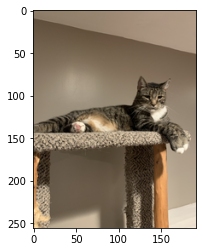

[('tabby, tabby cat', '43.6%'), ('golden retriever', '0.0%'), ('guinea pig, Cavia cobaya', '0.0%'), ('hamster', '0.0%'), ('hare', '0.0%')]


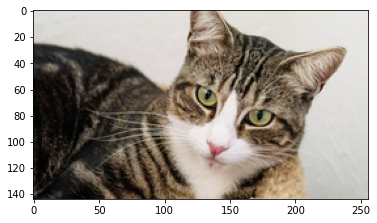

[('tabby, tabby cat', '74.5%'), ('guinea pig, Cavia cobaya', '0.0%'), ('golden retriever', '0.0%'), ('hamster', '0.0%'), ('hare', '0.0%')]


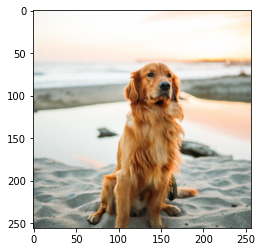

[('golden retriever', '79.5%'), ('guinea pig, Cavia cobaya', '0.0%'), ('hare', '0.0%'), ('tabby, tabby cat', '0.0%'), ('hamster', '0.0%')]


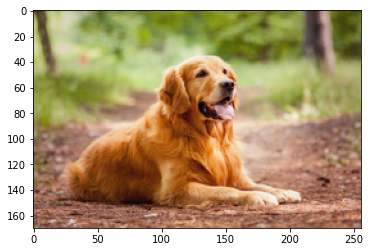

[('golden retriever', '82.8%'), ('guinea pig, Cavia cobaya', '0.0%'), ('hamster', '0.0%'), ('hare', '0.0%'), ('tabby, tabby cat', '0.0%')]


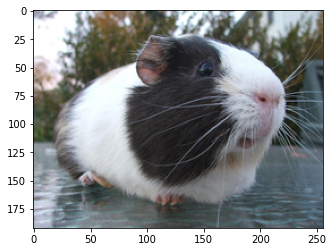

[('guinea pig, Cavia cobaya', '87.2%'), ('hamster', '0.3%'), ('hare', '0.0%'), ('tabby, tabby cat', '0.0%'), ('golden retriever', '0.0%')]


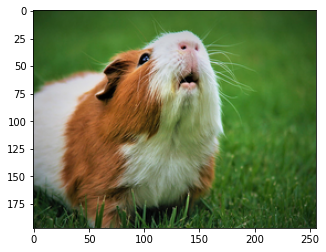

[('guinea pig, Cavia cobaya', '86.2%'), ('hamster', '0.5%'), ('hare', '0.1%'), ('tabby, tabby cat', '0.0%'), ('golden retriever', '0.0%')]


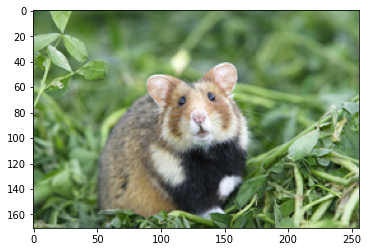

[('hamster', '48.7%'), ('guinea pig, Cavia cobaya', '2.5%'), ('hare', '0.6%'), ('tabby, tabby cat', '0.2%'), ('golden retriever', '0.0%')]


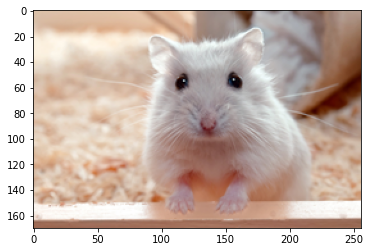

[('hamster', '71.6%'), ('hare', '0.0%'), ('guinea pig, Cavia cobaya', '0.0%'), ('golden retriever', '0.0%'), ('tabby, tabby cat', '0.0%')]


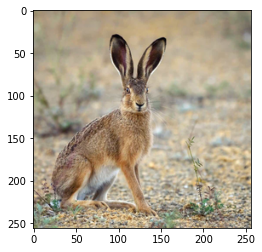

[('hare', '83.8%'), ('tabby, tabby cat', '0.0%'), ('hamster', '0.0%'), ('golden retriever', '0.0%'), ('guinea pig, Cavia cobaya', '0.0%')]


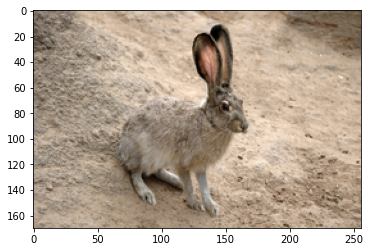

[('hare', '84.1%'), ('tabby, tabby cat', '0.0%'), ('hamster', '0.0%'), ('golden retriever', '0.0%'), ('guinea pig, Cavia cobaya', '0.0%')]


In [ ]:
for uri, result in zip(uris, results):
  img = Image.open(requests.get(uri, stream=True).raw)
  img.thumbnail((256,256), Image.ANTIALIAS)
  plt.imshow(img)
  plt.show()
  print(result)

#2

In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, Normalize, Resize
transformation = transforms.Compose([transforms.ToTensor(),  transforms.Normalize((0.1307,), (0.3081,))])
data_train = MNIST('~/mnist_data', train=True, download=True, transform = transformation)


train_dataloader = torch.utils.data.DataLoader(
  MNIST('~/mnist_data', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Resize((224,224)),
                               transforms.Lambda(lambda x: x.repeat(3,1,1)),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=16, shuffle=True)

test_dataloader = torch.utils.data.DataLoader(
  MNIST('~/mnist_data', train=False, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Resize((224,224)),
                               transforms.Lambda(lambda x: x.repeat(3,1,1)),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=16, shuffle=True)

dataloaders = {'train':train_dataloader, 'val':test_dataloader}
dataset_sizes = {'train': 60000, 'val' : 10000}



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/mnist_data/MNIST/raw



In [ ]:
model_ft = models.resnet18(pretrained = True)


num_ftrs = model_ft.fc.in_features


for param in model_ft.parameters():
    param.requires_grad = False

model_ft.fc = nn.Linear(num_ftrs, 10)

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr = 0.001, momentum = 0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25, permutation = [0,1,2,3]):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.permute(permutation)
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model


In [ ]:
model_ft.load_state_dict(torch.load('/content/myModelBEST', map_location = torch.device(device)))

#The above line is used for successive learning runs
#After 10 epochs I would save the model and rerun so I would not lose any data
#due to being disconnected from google colab



model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs = 10, permutation = [0,1,2,3])
torch.save(model_ft.state_dict(), 'myModel')

Epoch 0/9
----------
train Loss: 0.2210 Acc: 0.9281
val Loss: 0.1367 Acc: 0.9553

Epoch 1/9
----------
train Loss: 0.1827 Acc: 0.9411
val Loss: 0.1259 Acc: 0.9593

Epoch 2/9
----------
train Loss: 0.1671 Acc: 0.9468
val Loss: 0.1235 Acc: 0.9606

Epoch 3/9
----------
train Loss: 0.1591 Acc: 0.9490
val Loss: 0.1159 Acc: 0.9645

Epoch 4/9
----------
train Loss: 0.1509 Acc: 0.9522
val Loss: 0.1111 Acc: 0.9639

Epoch 5/9
----------
train Loss: 0.1481 Acc: 0.9528
val Loss: 0.1071 Acc: 0.9665

Epoch 6/9
----------
train Loss: 0.1435 Acc: 0.9536
val Loss: 0.1043 Acc: 0.9680

Epoch 7/9
----------
train Loss: 0.1348 Acc: 0.9565
val Loss: 0.1044 Acc: 0.9656

Epoch 8/9
----------
train Loss: 0.1338 Acc: 0.9575
val Loss: 0.1063 Acc: 0.9668

Epoch 9/9
----------
train Loss: 0.1312 Acc: 0.9580
val Loss: 0.0997 Acc: 0.9682

Training complete in 34m 38s
Best val Acc: 0.968200


In [ ]:
#Below line is to load the fine tuned model so I do not need to
#retrain everytime I work on the data
model_ft.load_state_dict(torch.load('/content/myModelFinal', map_location = torch.device(device)))

<All keys matched successfully>

In [ ]:
confMatrix = np.zeros((10,10))
numCorrect = 0

model_ft.eval()

for inputs, labels in test_dataloader:
  inputs = inputs.to(device)
  labels = labels.to(device)
  with torch.set_grad_enabled(False):
    outputs = model_ft(inputs)
    _, preds = torch.max(outputs, 1)
  numCorrect += torch.sum(preds == labels.data)

  for i in range(len(preds)):
    confMatrix[labels.data[i], preds[i]] = confMatrix[labels.data[i], preds[i]] + 1
print(numCorrect)

tensor(9682, device='cuda:0')


In [ ]:
trueConfMatrix = measure(confMatrix)

Class: 0
	TP: 971.0
	FN: 9.0
	FP: 23.0
	TN: 8997.0
	Accuracy per class: 0.9968
	Recall: 0.9908163265306122
	Precision: 0.9768611670020121
	F-Score: 0.9929078014184398
Class: 1
	TP: 1127.0
	FN: 8.0
	FP: 16.0
	TN: 8849.0
	Accuracy per class: 0.9976
	Recall: 0.9929515418502203
	Precision: 0.9860017497812773
	F-Score: 0.9964881474978051
Class: 2
	TP: 984.0
	FN: 48.0
	FP: 42.0
	TN: 8926.0
	Accuracy per class: 0.991
	Recall: 0.9534883720930233
	Precision: 0.9590643274853801
	F-Score: 1.0029154518950436
Class: 3
	TP: 968.0
	FN: 42.0
	FP: 54.0
	TN: 8936.0
	Accuracy per class: 0.9904
	Recall: 0.9584158415841584
	Precision: 0.9471624266144814
	F-Score: 0.9940944881889764
Class: 4
	TP: 953.0
	FN: 29.0
	FP: 22.0
	TN: 8996.0
	Accuracy per class: 0.9949
	Recall: 0.9704684317718941
	Precision: 0.9774358974358974
	F-Score: 1.0035769034236075
Class: 5
	TP: 857.0
	FN: 35.0
	FP: 51.0
	TN: 9057.0
	Accuracy per class: 0.9914
	Recall: 0.9607623318385651
	Precision: 0.9438325991189427
	F-Score: 0.99111111111

In [ ]:
def run_model(model, imagePath, data_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])):
  image = Image.open(imagePath)
  img = data_transforms(image)
  img = img.unsqueeze(0)
  model.eval()
  fig = plt.figure()
  with torch.no_grad():
      inputs = img.to(device)
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)

      fig = plt.figure()
      fig.set_figheight(8)
      fig.set_figwidth(8)
      ax = plt.subplot()
      ax.axis('off')
      ax.set_title(f'predicted: {class_names[preds[0]]}')
      plt.imshow(plt.imread(imagePath))
      plt.show()
      return preds

<Figure size 432x288 with 0 Axes>

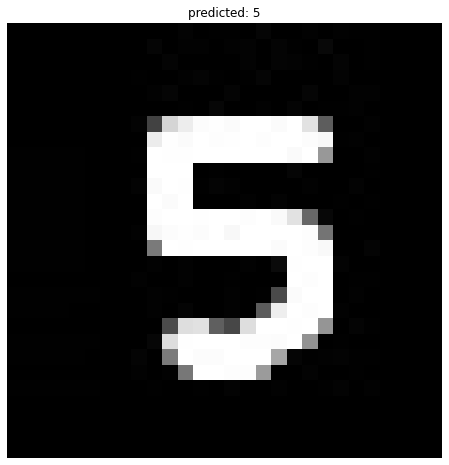

tensor([5], device='cuda:0')


In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]
preds = run_model(model_ft, '/content/testImage.jpg', data_transforms=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Resize((224,224)),
                               transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

#3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
%cd /content/drive/My\ Drive/

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
!unzip '/content/drive/MyDrive/catdogDataset.zip' -d '/content/catdogData'

Streaming output truncated to the last 5000 lines.
  inflating: /content/catdogData/train/val/cat/cat.19.jpg  
  inflating: /content/catdogData/train/val/cat/cat.190.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1900.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1901.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1902.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1903.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1904.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1905.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1906.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1907.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1908.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1909.jpg  
  inflating: /content/catdogData/train/val/cat/cat.191.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1910.jpg  
  inflating: /content/catdogData/train/val/cat/cat.1911.jpg  
  inflating: /content/c

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/catdogData/train'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

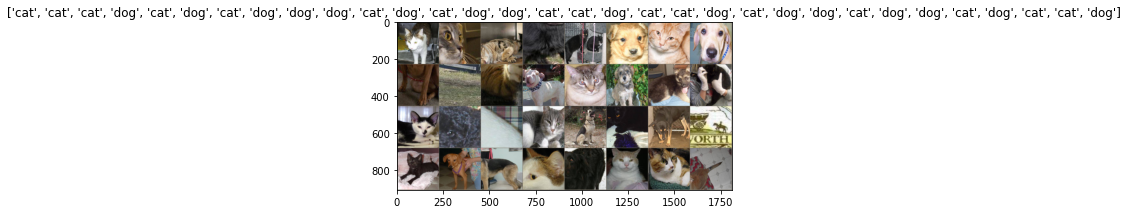

In [ ]:
import torchvision
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

#GoogLeNet

In [ ]:
from torchvision.models.googlenet import googlenet
model_ft_google = models.googlenet(pretrained = True)

for param in model_ft_google.parameters():
    param.requires_grad = False

num_ftrs_google = model_ft_google.fc.in_features
model_ft_google.fc = nn.Linear(num_ftrs_google, 2)

model_ft_google = model_ft_google.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft_google.parameters(), lr = 0.001, momentum = 0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)

In [ ]:
#model_ft_google.load_state_dict(torch.load('catDogGoogleBEST', map_location = device)) #This is used to train network again after saving
model_ft_google = train_model(model_ft_google, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=12, permutation = [0,1,2,3])
torch.save(model_ft_google.state_dict(), 'catDogGoogle')

Epoch 0/11
----------
train Loss: 0.2450 Acc: 0.9054
val Loss: 0.0881 Acc: 0.9750

Epoch 1/11
----------
train Loss: 0.1770 Acc: 0.9271
val Loss: 0.0697 Acc: 0.9792

Epoch 2/11
----------
train Loss: 0.1719 Acc: 0.9269
val Loss: 0.0635 Acc: 0.9803

Epoch 3/11
----------
train Loss: 0.1623 Acc: 0.9307
val Loss: 0.0624 Acc: 0.9792

Epoch 4/11
----------
train Loss: 0.1638 Acc: 0.9305
val Loss: 0.0602 Acc: 0.9793

Epoch 5/11
----------
train Loss: 0.1576 Acc: 0.9327
val Loss: 0.0591 Acc: 0.9803

Epoch 6/11
----------
train Loss: 0.1587 Acc: 0.9320
val Loss: 0.0562 Acc: 0.9813

Epoch 7/11
----------
train Loss: 0.1596 Acc: 0.9294
val Loss: 0.0561 Acc: 0.9808

Epoch 8/11
----------
train Loss: 0.1592 Acc: 0.9301
val Loss: 0.0569 Acc: 0.9802

Epoch 9/11
----------
train Loss: 0.1565 Acc: 0.9315
val Loss: 0.0550 Acc: 0.9818

Epoch 10/11
----------
train Loss: 0.1564 Acc: 0.9316
val Loss: 0.0565 Acc: 0.9802

Epoch 11/11
----------
train Loss: 0.1550 Acc: 0.9345
val Loss: 0.0609 Acc: 0.9782

Tr

In [ ]:
torch.save(model_ft_google.state_dict(), 'catDogGoogle')

In [ ]:
confMatrix = np.zeros((2,2))
numCorrect = 0

model_ft_google.eval()

for inputs, labels in dataloaders['val']:
  inputs = inputs.to(device)
  labels = labels.to(device)
  with torch.set_grad_enabled(False):
    outputs = model_ft_google(inputs)
    _, preds = torch.max(outputs, 1)
  numCorrect += torch.sum(preds == labels.data)
  for i in range(len(preds)):
    confMatrix[labels.data[i], preds[i]] = confMatrix[labels.data[i], preds[i]] + 1

In [ ]:
trueConfMatrixGoogle = measure(confMatrix)

Class: 0
	TP: 2950.0
	FN: 50.0
	FP: 59.0
	TN: 2941.0
	Accuracy per class: 0.9818333333333333
	Recall: 0.9833333333333333
	Precision: 0.9803921568627451
	F-Score: 0.9985022466300549
Class: 1
	TP: 2941.0
	FN: 59.0
	FP: 50.0
	TN: 2950.0
	Accuracy per class: 0.9818333333333333
	Recall: 0.9803333333333333
	Precision: 0.9832831828819792
	F-Score: 1.0015022533800702
Confusion Matrix:
[[0.98333333 0.01666667]
 [0.01966667 0.98033333]]
Average Accuracy per class: 0.9818333333333333
Average Recall: 0.9818333333333333
Average Precision: 0.9818376698723621
Average F-Score: 1.0000022500050625
Overall Accuracy: 0.9818333333333333


<Figure size 432x288 with 0 Axes>

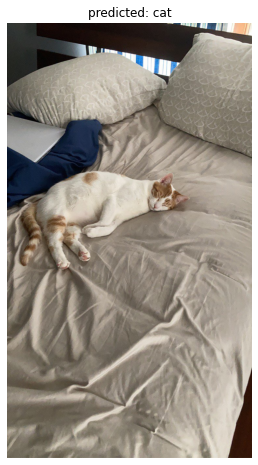

tensor([0], device='cuda:0')

In [ ]:
run_model(model_ft_google, '/content/testImage.jpg')

#AlexNet


In [ ]:
from torchvision.models.alexnet import alexnet

model_ft_alex = models.alexnet(pretrained = True)

for param in model_ft_alex.parameters():
    param.requires_grad = False


model_ft_alex.classifier[6] = nn.Linear(model_ft_alex.classifier[6].in_features, 2)
model_ft_alex = model_ft_alex.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft_alex.parameters(), lr = 0.001, momentum = 0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size = 7, gamma = 0.1)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
model_ft_alex.load_state_dict(torch.load('/content/drive/MyDrive/catDogAlexnetBEST', map_location = device))
model_ft_alex = train_model(model_ft_alex, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=12, permutation = [0,1,2,3])
torch.save(model_ft_alex.state_dict(), 'catDogAlexnet')

Epoch 0/11
----------
train Loss: 0.1916 Acc: 0.9206
val Loss: 0.1024 Acc: 0.9610

Epoch 1/11
----------
train Loss: 0.1830 Acc: 0.9261
val Loss: 0.1007 Acc: 0.9622

Epoch 2/11
----------
train Loss: 0.1859 Acc: 0.9248
val Loss: 0.0911 Acc: 0.9645

Epoch 3/11
----------
train Loss: 0.1951 Acc: 0.9202
val Loss: 0.0979 Acc: 0.9620

Epoch 4/11
----------
train Loss: 0.1871 Acc: 0.9234
val Loss: 0.0913 Acc: 0.9658

Epoch 5/11
----------
train Loss: 0.1830 Acc: 0.9253
val Loss: 0.0960 Acc: 0.9642

Epoch 6/11
----------
train Loss: 0.1940 Acc: 0.9210
val Loss: 0.0978 Acc: 0.9613

Epoch 7/11
----------
train Loss: 0.1693 Acc: 0.9285
val Loss: 0.0891 Acc: 0.9655

Epoch 8/11
----------
train Loss: 0.1664 Acc: 0.9308
val Loss: 0.0881 Acc: 0.9663

Epoch 9/11
----------
train Loss: 0.1709 Acc: 0.9285
val Loss: 0.0882 Acc: 0.9658

Epoch 10/11
----------
train Loss: 0.1665 Acc: 0.9302
val Loss: 0.0860 Acc: 0.9668

Epoch 11/11
----------
train Loss: 0.1576 Acc: 0.9329
val Loss: 0.0850 Acc: 0.9678

Tr

In [ ]:
model_ft_alex.load_state_dict(torch.load('catDogAlexnet', map_location = device))

<All keys matched successfully>

In [ ]:
confMatrix = np.zeros((2,2))
numCorrect = 0

model_ft_alex.eval()

for inputs, labels in dataloaders['val']:

  inputs = inputs.to(device)
  labels = labels.to(device)
  with torch.set_grad_enabled(False):
    outputs = model_ft_alex(inputs)
    _, preds = torch.max(outputs, 1)
  numCorrect += torch.sum(preds == labels.data)
  for i in range(len(preds)):
    confMatrix[labels.data[i], preds[i]] = confMatrix[labels.data[i], preds[i]] + 1

In [ ]:
measure(confMatrix)

Class: 0
	TP: 2914.0
	FN: 86.0
	FP: 107.0
	TN: 2893.0
	Accuracy per class: 0.9678333333333333
	Recall: 0.9713333333333334
	Precision: 0.9645812644819596
	F-Score: 0.996512207274539
Class: 1
	TP: 2893.0
	FN: 107.0
	FP: 86.0
	TN: 2914.0
	Accuracy per class: 0.9678333333333333
	Recall: 0.9643333333333334
	Precision: 0.9711312520980194
	F-Score: 1.0035122930255895
Confusion Matrix:
[[0.97133333 0.02866667]
 [0.03566667 0.96433333]]
Average Accuracy per class: 0.9678333333333333
Average Recall: 0.9678333333333333
Average Precision: 0.9678562582899894
Average F-Score: 1.0000122501500643
Overall Accuracy: 0.9678333333333333


array([[0.97133333, 0.02866667],
       [0.03566667, 0.96433333]])

<Figure size 432x288 with 0 Axes>

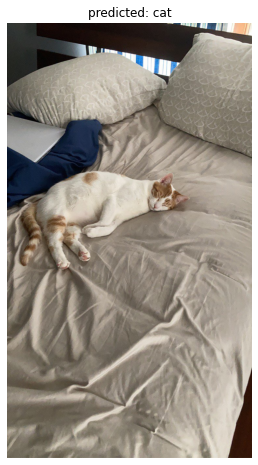

tensor([0], device='cuda:0')

In [ ]:
imgPath = '/content/testImage.jpg'
run_model(model_ft_alex, imgPath)

#Extra Credit

In [ ]:
uris = [
    'https://cdn.discordapp.com/attachments/849146388733886505/1037425637138387024/image0.jpg',
    'https://www.thesprucepets.com/thmb/QDw4vt7XXQejL2IRztKeRLow6hA=/2776x1561/smart/filters:no_upscale()/cat-talk-eyes-553942-hero-df606397b6ff47b19f3ab98589c3e2ce.jpg',
    'https://images.saymedia-content.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:eco%2Cw_1200/MTc0MDk2MzYxNjM1OTgwODY2/what-you-should-know-about-owning-a-golden-retriever.jpg',
    'https://www.hepper.com/wp-content/uploads/2021/11/golden-retriever_Shutterstock.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/3/30/George_the_amazing_guinea_pig.jpg/1200px-George_the_amazing_guinea_pig.jpg',
    'https://static.wixstatic.com/media/e84d8b_a25cad7003fe436caeb0169c6bd03af2~mv2_d_3456_2304_s_2.jpg/v1/crop/x_241,y_0,w_2974,h_2304/fill/w_560,h_432,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/guinea%20pig.jpg',
    'https://cdn.mos.cms.futurecdn.net/2Nr5Z7BJSx3bLvaAZTfwbW.jpg',
    'https://cf.ltkcdn.net/small-pets/images/orig/240613-2124x1411-Dwarf-hamster.jpg',
    'https://a-z-animals.com/media/hare-1.jpg',
    'https://blog.wcs.org/photo/wp-content/uploads/2014/11/Julie-Larsen-Maher-0300-Antelope-Jackrabbit-11-23-04.jpg'
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
)

attackDataloader = torch.utils.data.DataLoader(batch)



In [ ]:
inputLabels = np.zeros([10,1000])
for i in range(10):
  inputLabels[i, trueData[i]] = 1.0

In [ ]:
def fast_gradient_sign_method(model, imgs, labels, epsilon=0.02):
    inp_imgs = imgs.clone().requires_grad_()
    preds = model(inp_imgs.to(device))
    preds = torch.nn.functional.log_softmax(preds, dim=-1)
    loss = -torch.gather(preds, 1, labels.to(device).unsqueeze(dim=-1))
    loss.sum().backward()
    noise_grad = torch.sign(inp_imgs.grad.to(imgs.device))
    fake_imgs = imgs + epsilon * noise_grad
    fake_imgs.detach_()
    return fake_imgs, noise_grad

fakeImgBatch, noise_grad_batch = fast_gradient_sign_method(resnet50, batch, torch.tensor([281, 281, 207, 207, 338, 338, 333, 333, 331, 331], dtype = torch.int64),epsilon=0.02)

with torch.no_grad():
    output = torch.nn.functional.softmax(resnet50(fakeImgBatch.to(device)), dim=1)
      

results = utils.pick_n_best(predictions=output, n=5)

sample 0: [('carton', '21.4%'), ('wardrobe, closet, press', '6.4%'), ('tiger cat', '5.2%'), ('hamper', '4.4%'), ('Egyptian cat', '3.7%')]
sample 1: [('Egyptian cat', '35.2%'), ('tiger cat', '23.9%'), ('tabby, tabby cat', '11.2%'), ('carton', '0.2%'), ('lynx, catamount', '0.1%')]
sample 2: [('Irish setter, red setter', '26.7%'), ('golden retriever', '15.5%'), ('tennis ball', '5.8%'), ('cocker spaniel, English cocker spaniel, cocker', '1.0%'), ('goldfish, Carassius auratus', '0.9%')]
sample 3: [('golden retriever', '33.4%'), ('tennis ball', '2.5%'), ('soccer ball', '0.9%'), ('Greater Swiss Mountain dog', '0.7%'), ('Brittany spaniel', '0.5%')]
sample 4: [('guinea pig, Cavia cobaya', '47.5%'), ('hamster', '0.4%'), ('acorn', '0.2%'), ('beaver', '0.2%'), ('lakeside, lakeshore', '0.2%')]
sample 5: [('guinea pig, Cavia cobaya', '31.4%'), ('hamster', '0.4%'), ('beaver', '0.3%'), ('Appenzeller', '0.3%'), ('hummingbird', '0.2%')]
sample 6: [('weasel', '6.8%'), ('polecat, fitch, foulmart, foumart,

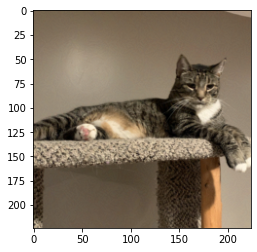

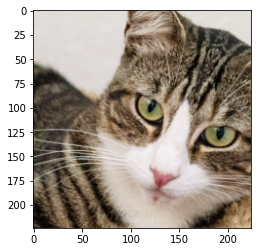

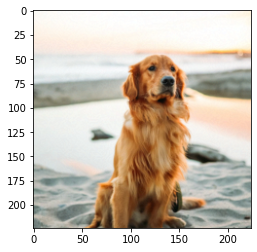

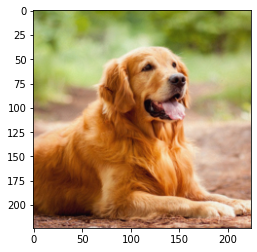

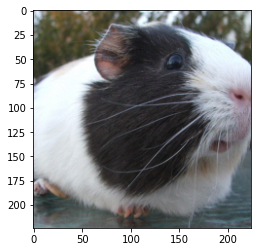

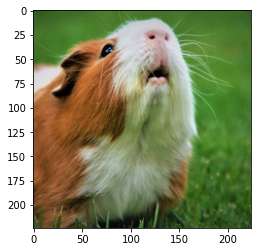

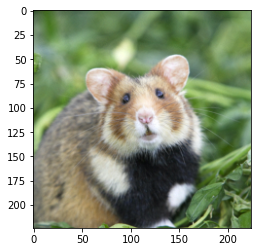

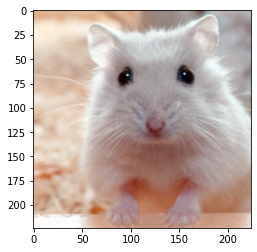

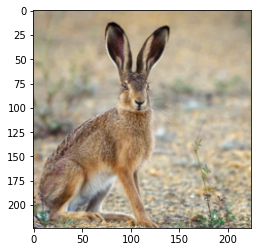

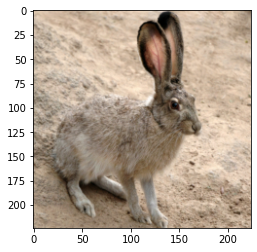

In [ ]:
NORM_MEAN = np.array([0.485, 0.456, 0.406])
NORM_STD = np.array([0.229, 0.224, 0.225])

for img in fakeImgBatch:
  img = img.cpu().permute(1, 2, 0).numpy()
  img = (img * NORM_STD[None,None]) + NORM_MEAN[None,None]
  img = np.clip(img, a_min=0.0, a_max=1.0)
  plt.imshow(np.array(img))
  plt.show()

  #One can see that the images look almost identical to the human eye, however the confidence level of the neural network is low
  #The method used is a white box attack. This means it has access to the inside of the neural network.